In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from collections import Counter
from pandas.tools.plotting import parallel_coordinates
from sklearn.decomposition import PCA
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from plotly.offline import init_notebook_mode,iplot

In [2]:
init_notebook_mode(connected=True)
color = sns.color_palette()
%matplotlib inline

In [41]:
train = pd.read_csv(r'D:\\project\\data_analyze\\forest\\train.csv')
test = pd.read_csv(r'D:\\project\\data_analyze\\forest\\test.csv')

print('Train dataset shape:{}'.format(train.shape))
print('Test dataset shape:{}'.format(test.shape))

Train dataset shape:(15120, 56)
Test dataset shape:(565892, 55)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [6]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [7]:
train.isnull().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


D:\software\Aconada\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



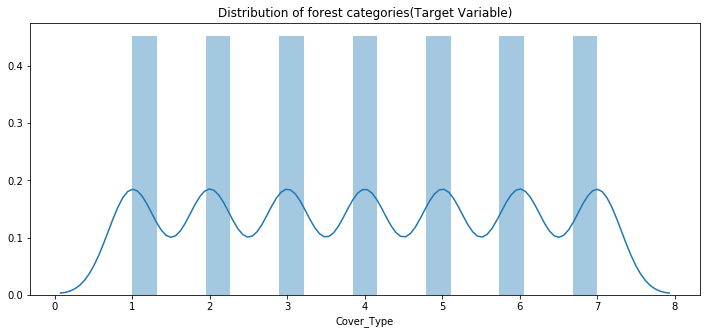

In [8]:
plt.figure(figsize=(12,5))
plt.title('Distribution of forest categories(Target Variable)')
ax = sns.distplot(train['Cover_Type'])

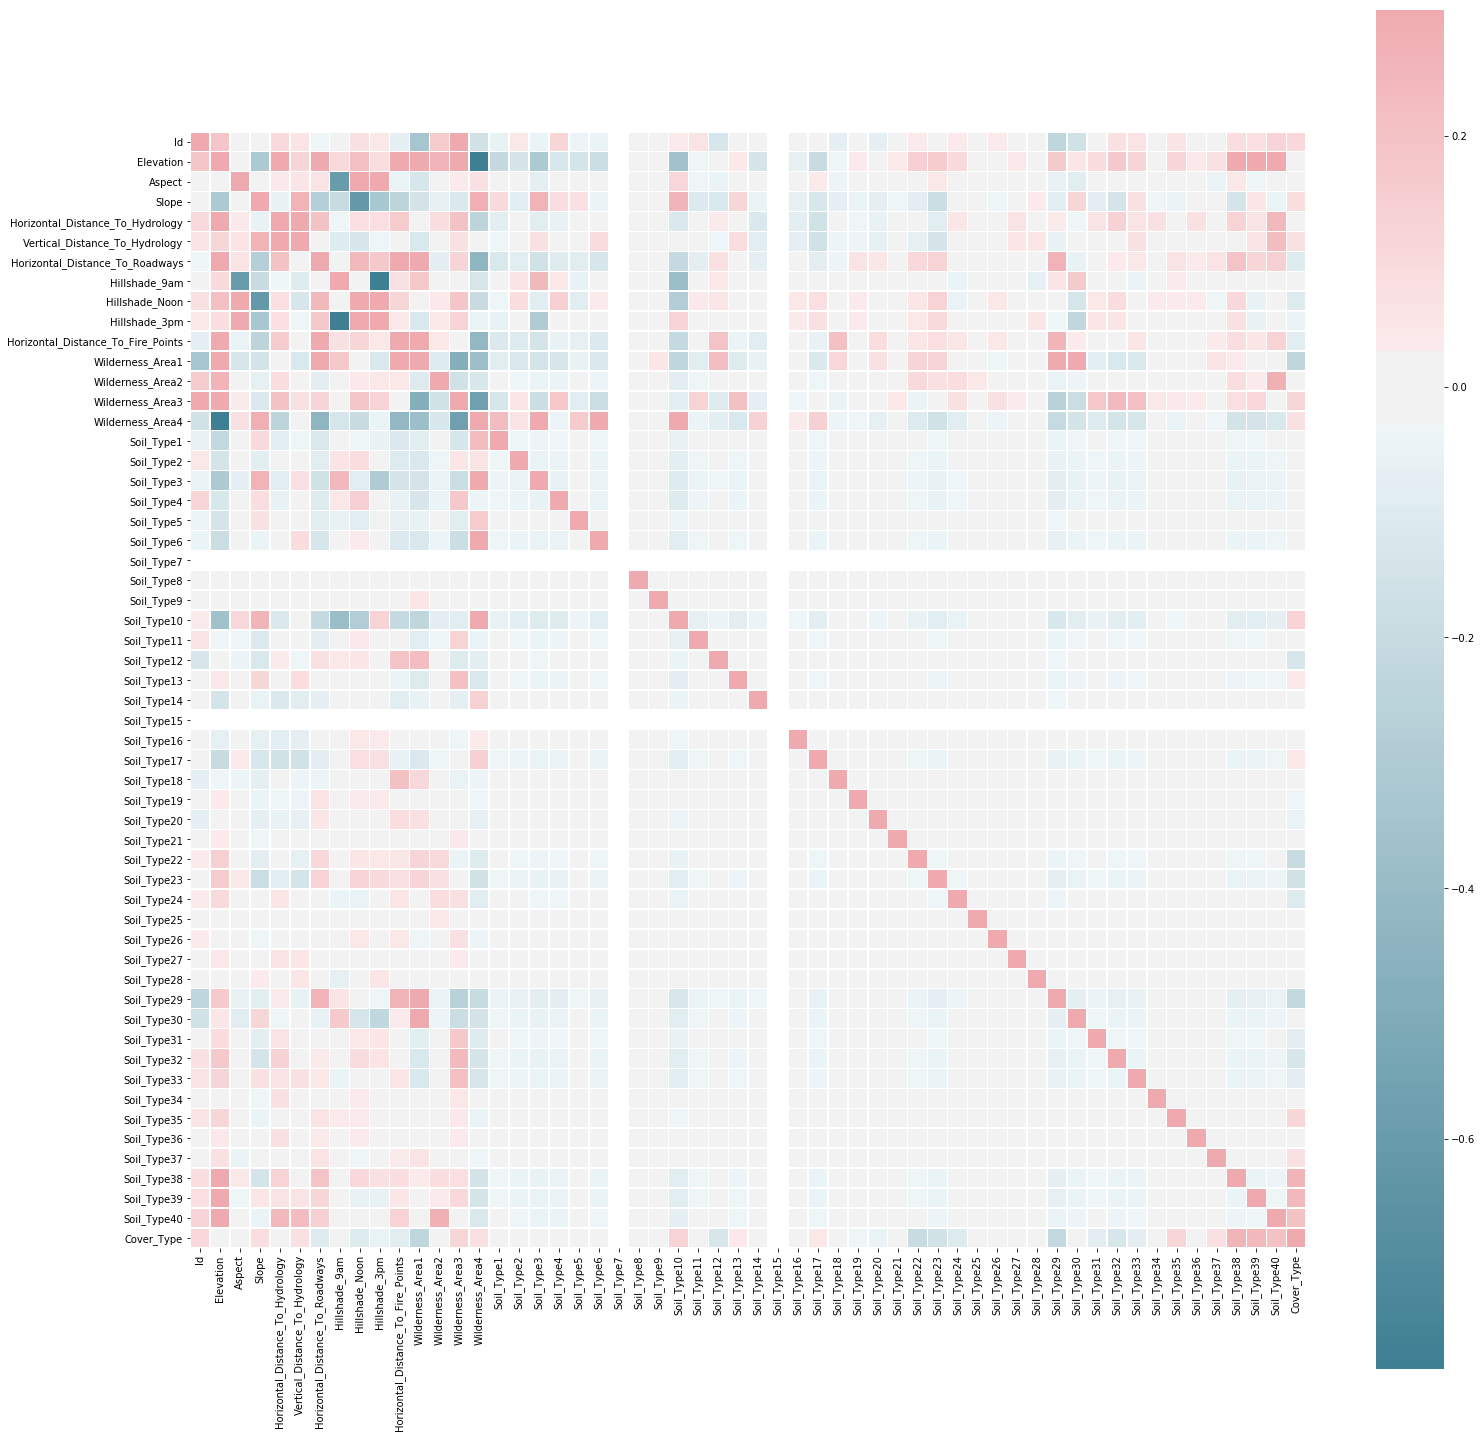

In [10]:
corr = train.corr()
f,ax = plt.subplots(figsize=(25,25))
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(corr,cmap=cmap,vmax=.3,center=0,square=True,linewidths=.5)

In [11]:
corr

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,1.000000,0.185496,0.017702,-0.020168,0.099637,0.055348,-0.033028,0.000786,0.073123,0.042524,...,0.068048,0.066887,0.022520,0.057480,0.009110,0.016040,0.086932,0.083376,0.122475,0.108363
Elevation,0.185496,1.000000,-0.011096,-0.312640,0.412712,0.122092,0.578659,0.097900,0.215782,0.089518,...,0.172349,0.123821,0.021876,0.120157,0.040571,0.073825,0.323440,0.296405,0.306755,0.016090
Aspect,0.017702,-0.011096,1.000000,0.028148,0.040732,0.056412,0.066184,-0.593997,0.324912,0.635022,...,0.003700,0.018719,0.012927,-0.004235,0.003160,-0.046309,0.043860,-0.031342,0.007208,0.008015
Slope,-0.020168,-0.312640,0.028148,1.000000,-0.055976,0.265314,-0.277049,-0.200072,-0.612613,-0.326887,...,-0.147258,0.072027,-0.030590,-0.048855,-0.004570,0.003129,-0.148342,0.051900,-0.043513,0.087722
Horizontal_Distance_To_Hydrology,0.099637,0.412712,0.040732,-0.055976,1.000000,0.652142,0.203397,-0.033803,0.080047,0.080833,...,0.138275,0.062121,0.072485,-0.015446,0.077251,-0.009549,0.131444,0.066284,0.242304,-0.010515
Vertical_Distance_To_Hydrology,0.055348,0.122092,0.056412,0.265314,0.652142,1.000000,0.011555,-0.095930,-0.132948,-0.035559,...,0.020298,0.077167,0.028910,-0.021662,0.015680,-0.020717,-0.008989,0.058981,0.227110,0.075647
Horizontal_Distance_To_Roadways,-0.033028,0.578659,0.066184,-0.277049,0.203397,0.011555,1.000000,-0.003398,0.240684,0.173882,...,0.031538,0.045797,0.021415,0.065310,0.030282,0.063302,0.197892,0.120953,0.144786,-0.105662
Hillshade_9am,0.000786,0.097900,-0.593997,-0.200072,-0.033803,-0.095930,-0.003398,1.000000,-0.013712,-0.779965,...,0.018760,-0.050739,0.004457,0.031228,0.013886,0.013207,0.012326,0.024492,-0.017234,-0.010286
Hillshade_Noon,0.073123,0.215782,0.324912,-0.612613,0.080047,-0.132948,0.240684,-0.013712,1.000000,0.614526,...,0.096261,-0.013129,0.034149,0.034638,0.029261,-0.035385,0.104682,-0.058979,-0.008203,-0.098905
Hillshade_3pm,0.042524,0.089518,0.635022,-0.326887,0.080833,-0.035559,0.173882,-0.779965,0.614526,1.000000,...,0.058244,0.024496,0.018298,0.000662,0.004545,-0.028055,0.069262,-0.056383,0.019158,-0.053399


In [42]:
train.drop(['Id'],inplace=True,axis=1)
train.drop(['Soil_Type7','Soil_Type15'],inplace=True,axis=1)
test.drop(['Soil_Type7','Soil_Type15'],inplace=True,axis=1)

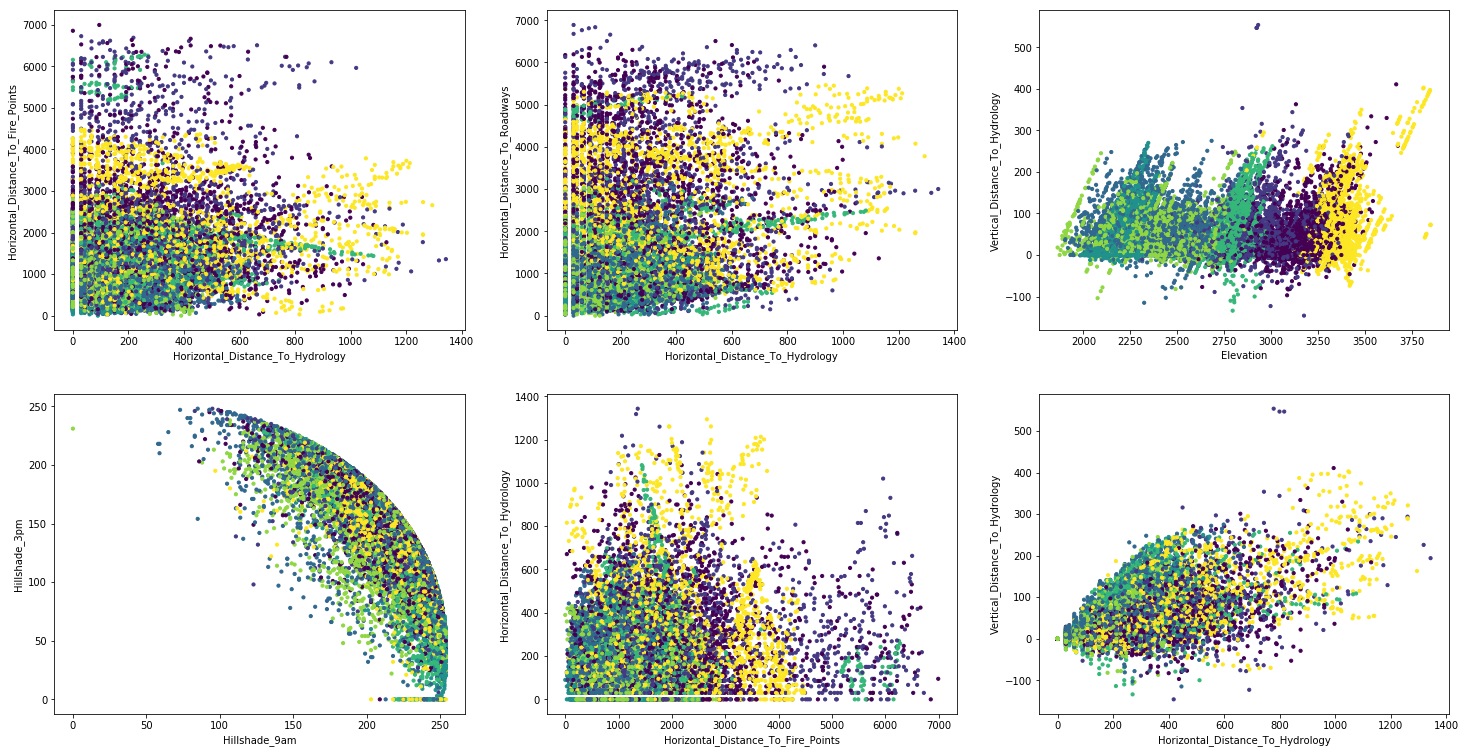

In [19]:
classes = np.array(list(train['Cover_Type'].values))

def plotRelation(first_frature,sec_feature):
    
    plt.scatter(first_frature,sec_feature,c=classes,s=10)
    plt.xlabel(first_frature.name)
    plt.ylabel(sec_feature.name)


f = plt.figure(figsize=(25,20))    
f.add_subplot(331)
plotRelation(train.Horizontal_Distance_To_Hydrology,train.Horizontal_Distance_To_Fire_Points)
f.add_subplot(332)
plotRelation(train.Horizontal_Distance_To_Hydrology,train.Horizontal_Distance_To_Roadways)
f.add_subplot(333)
plotRelation(train.Elevation,train.Vertical_Distance_To_Hydrology)
f.add_subplot(334)
plotRelation(train.Hillshade_9am,train.Hillshade_3pm)
f.add_subplot(335)
plotRelation(train.Horizontal_Distance_To_Fire_Points,train.Horizontal_Distance_To_Hydrology)
f.add_subplot(336)
plotRelation(train.Horizontal_Distance_To_Hydrology,train.Vertical_Distance_To_Hydrology)

In [43]:
train['HorizontalHydrology_HorizontalFire'] = train['Horizontal_Distance_To_Hydrology'] +train['Horizontal_Distance_To_Fire_Points']
train['Neg_HorizontalHydrology_HorizontalFire'] = train['Horizontal_Distance_To_Hydrology'] -train['Horizontal_Distance_To_Fire_Points']
train['HorizontalHydrology_HorizontalRoadways'] = train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways']
train['Neg_HorizontalHydrology_HorizontalRoadways'] = train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways']
train['HorizontalFire_Points_HorizontalRoadways'] = train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways']
train['Neg_HorizontalFire_Points_HorizontalRoadways'] = train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways']
train['Elevation_Vertical'] = train['Elevation'] + train['Vertical_Distance_To_Hydrology']
train['Neg_Elevation_Vertical'] = train['Elevation'] - train['Vertical_Distance_To_Hydrology']
train['mean_hillshade'] = (train['Hillshade_9am']+train['Hillshade_3pm']+train['Hillshade_Noon'])/3
train['Mean_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology'] +train['Horizontal_Distance_To_Fire_Points'])/2
train['Mean_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/2
train['Mean_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalHydrology_HorizontalFire'] = (train['Horizontal_Distance_To_Hydrology'] -train['Horizontal_Distance_To_Fire_Points'])/2
train['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (train['Horizontal_Distance_To_Hydrology']-train['Horizontal_Distance_To_Roadways'])/2
train['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (train['Horizontal_Distance_To_Fire_Points']-train['Horizontal_Distance_To_Roadways'])/2
train['Slope2'] = np.sqrt(train['Horizontal_Distance_To_Hydrology']**2 + train['Vertical_Distance_To_Hydrology']**2)
train['Mean_Fire_Hydrology_Roadways'] = (train['Horizontal_Distance_To_Fire_Points']+train['Horizontal_Distance_To_Hydrology']+train['Horizontal_Distance_To_Roadways'])/3
train['Mean_Fire_Hyd']=(train['Horizontal_Distance_To_Fire_Points'] + train['Horizontal_Distance_To_Hydrology']) / 2 
train['Vertical_Distance_To_Hydrology'] = np.abs(train['Vertical_Distance_To_Hydrology'])
train['Neg_EHyd'] = train['Elevation'] - train['Horizontal_Distance_To_Hydrology']*0.2

train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,2596,51,3,258,0,510,221,232,148,6279,...,3268.5,384.0,3394.5,-3010.5,-126.0,2884.5,258.000000,2349.000000,3268.5,2544.4
1,2590,56,2,212,6,390,220,235,151,6225,...,3218.5,301.0,3307.5,-3006.5,-89.0,2917.5,212.084889,2275.666667,3218.5,2547.6
2,2804,139,9,268,65,3180,234,238,135,6121,...,3194.5,1724.0,4650.5,-2926.5,-1456.0,1470.5,275.769832,3189.666667,3194.5,2750.4
3,2785,155,18,242,118,3090,238,238,122,6211,...,3226.5,1666.0,4650.5,-2984.5,-1424.0,1560.5,269.235956,3181.000000,3226.5,2736.6
4,2595,45,2,153,1,391,220,234,150,6172,...,3162.5,272.0,3281.5,-3009.5,-119.0,2890.5,153.003268,2238.666667,3162.5,2564.4


In [44]:
test['HorizontalHydrology_HorizontalFire'] = test['Horizontal_Distance_To_Hydrology'] +test['Horizontal_Distance_To_Fire_Points']
test['Neg_HorizontalHydrology_HorizontalFire'] = test['Horizontal_Distance_To_Hydrology'] -test['Horizontal_Distance_To_Fire_Points']
test['HorizontalHydrology_HorizontalRoadways'] = test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways']
test['Neg_HorizontalHydrology_HorizontalRoadways'] = test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways']
test['HorizontalFire_Points_HorizontalRoadways'] = test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways']
test['Neg_HorizontalFire_Points_HorizontalRoadways'] = test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways']
test['Elevation_Vertical'] = test['Elevation'] + test['Vertical_Distance_To_Hydrology']
test['Neg_Elevation_Vertical'] = test['Elevation'] - test['Vertical_Distance_To_Hydrology']
test['mean_hillshade'] = (test['Hillshade_9am']+test['Hillshade_3pm']+test['Hillshade_Noon'])/3
test['Mean_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology'] +test['Horizontal_Distance_To_Fire_Points'])/2
test['Mean_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/2
test['Mean_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalHydrology_HorizontalFire'] = (test['Horizontal_Distance_To_Hydrology'] -test['Horizontal_Distance_To_Fire_Points'])/2
test['MeanNeg_HorizontalHydrology_HorizontalRoadways'] = (test['Horizontal_Distance_To_Hydrology']-test['Horizontal_Distance_To_Roadways'])/2
test['MeanNeg_HorizontalFire_Points_HorizontalRoadways'] = (test['Horizontal_Distance_To_Fire_Points']-test['Horizontal_Distance_To_Roadways'])/2
test['Slope2'] = np.sqrt(test['Horizontal_Distance_To_Hydrology']**2 + test['Vertical_Distance_To_Hydrology']**2)
test['Mean_Fire_Hydrology_Roadways'] = (test['Horizontal_Distance_To_Fire_Points']+test['Horizontal_Distance_To_Hydrology']+test['Horizontal_Distance_To_Roadways'])/3
test['Mean_Fire_Hyd']=(test['Horizontal_Distance_To_Fire_Points'] + test['Horizontal_Distance_To_Hydrology']) / 2 
test['Vertical_Distance_To_Hydrology'] = np.abs(test['Vertical_Distance_To_Hydrology'])
test['Neg_EHyd'] = test['Elevation'] - test['Horizontal_Distance_To_Hydrology']*0.2
test.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,15121,2680,354,14,0,0,2684,196,214,156,...,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,15122,2683,0,13,0,0,2654,201,216,152,...,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,15123,2713,16,15,0,0,2980,206,208,137,...,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,15124,2709,24,17,0,0,2950,208,201,125,...,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,15125,2706,29,19,0,0,2920,210,195,115,...,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [45]:
from sklearn.model_selection import train_test_split

x = train.drop(['Cover_Type'],axis=1)
y = train['Cover_Type']
print(y.head())
x_train,x_test,y_train,y_test = train_test_split(x.values,y.values,test_size=0.05,random_state=42)

0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64


In [46]:
unique,count = np.unique(y_train,return_counts=True)
print('The number of occurances of each class in the dataset = %s'%dict(zip(unique,count)),'\n')

The number of occurances of each class in the dataset = {1: 2047, 2: 2057, 3: 2036, 4: 2071, 5: 2048, 6: 2061, 7: 2044} 



In [47]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier()
clf.fit(x_train,y_train)
z = clf.feature_importances_
df = pd.DataFrame({'values':z,
                   'column':list(x.columns.values)})
df.sort_values(by='values',ascending=False,inplace=True)
df.head(100)

D:\software\Aconada\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



,values,column
0,0.078008,Elevation
58,0.070787,Elevation_Vertical
59,0.070258,Neg_Elevation_Vertical
70,0.069469,Neg_EHyd
13,0.035111,Wilderness_Area4
22,0.026082,Soil_Type10
10,0.023916,Wilderness_Area1
55,0.023552,Neg_HorizontalHydrology_HorizontalRoadways
67,0.022862,Slope2
65,0.022807,MeanNeg_HorizontalHydrology_HorizontalRoadways


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [30]:
train.isnull().sum()

Elevation                                           0
Aspect                                              0
Slope                                               0
Horizontal_Distance_To_Hydrology                    0
Vertical_Distance_To_Hydrology                      0
Horizontal_Distance_To_Roadways                     0
Hillshade_9am                                       0
Hillshade_Noon                                      0
Hillshade_3pm                                       0
Horizontal_Distance_To_Fire_Points                  0
Wilderness_Area1                                    0
Wilderness_Area2                                    0
Wilderness_Area3                                    0
Wilderness_Area4                                    0
Soil_Type1                                          0
Soil_Type2                                          0
Soil_Type3                                          0
Soil_Type4                                          0
Soil_Type5                  

In [49]:
from sklearn.model_selection import GridSearchCV

n_estimators = np.linspace(start=600,stop=1000,num=8,dtype=np.int)
param_grid = {'n_estimators':n_estimators}
grid = GridSearchCV(clf,param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy')
grid.fit(x_train,y_train)

print('the best parameters are %s with score of %0.0f'%(grid.best_params_,grid.best_score_*100))
print('the best estimator accuracy on the test set %0.0f'%(grid.best_estimator_.score(x_test,y_test)*100))

the best parameters are {'n_estimators': 885} with score of 90
the best estimator accuracy on the test set 93


In [50]:
clf = ExtraTreesClassifier(n_estimators=885,random_state=0)
clf.fit(x_train,y_train)
print('Accuracy of classifier on training set:%0.0f'%(clf.score(x_train,y_train)*100))
print('Accuracy of classifier on testing set:%0.0f'%(clf.score(x_test,y_test)*100))

Accuracy of classifier on training set:100
Accuracy of classifier on testing set:93


In [51]:
test.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Mean_HorizontalHydrology_HorizontalFire,Mean_HorizontalHydrology_HorizontalRoadways,Mean_HorizontalFire_Points_HorizontalRoadways,MeanNeg_HorizontalHydrology_HorizontalFire,MeanNeg_HorizontalHydrology_HorizontalRoadways,MeanNeg_HorizontalFire_Points_HorizontalRoadways,Slope2,Mean_Fire_Hydrology_Roadways,Mean_Fire_Hyd,Neg_EHyd
0,15121,2680,354,14,0,0,2684,196,214,156,...,3322.5,1342.0,4664.5,-3322.5,-1342.0,1980.5,0.0,3109.666667,3322.5,2680.0
1,15122,2683,0,13,0,0,2654,201,216,152,...,3337.5,1327.0,4664.5,-3337.5,-1327.0,2010.5,0.0,3109.666667,3337.5,2683.0
2,15123,2713,16,15,0,0,2980,206,208,137,...,3172.0,1490.0,4662.0,-3172.0,-1490.0,1682.0,0.0,3108.000000,3172.0,2713.0
3,15124,2709,24,17,0,0,2950,208,201,125,...,3187.0,1475.0,4662.0,-3187.0,-1475.0,1712.0,0.0,3108.000000,3187.0,2709.0
4,15125,2706,29,19,0,0,2920,210,195,115,...,3202.0,1460.0,4662.0,-3202.0,-1460.0,1742.0,0.0,3108.000000,3202.0,2706.0


In [52]:
id = test['Id']
test.drop(['Id'],inplace=True,axis=1)
test = scaler.transform(test)

D:\software\Aconada\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [53]:
predictions = clf.predict(test)

In [54]:
sub = pd.DataFrame({'Id':id,
                  'Cover_Type':predictions})
sub.to_csv('submission.csv',index=False)
sub.head()

,Id,Cover_Type
0,15121,1
1,15122,1
2,15123,1
3,15124,1
4,15125,1
